In [6]:
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath

from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [12]:
al_thickness, al_counts, al_times = np.loadtxt("../data/counts_cs137_alu.csv",skiprows=1, unpack=True, delimiter=',')
al_rates = al_counts / al_times
al_rates_sigma = al_rates * (ERROR_ATTENUATION_COUNT / al_counts + ERROR_TIME / al_times)
# TODO: put errors in description because small

al_params, al_cov = np.polyfit(al_thickness, np.log(al_rates),1, cov=True)
sigma_al_params = np.sqrt(np.diag(al_cov))
print(f"Attenuation coefficient pour alu: {abs(al_params[0]):.3f} ± {sigma_al_params[0]:.3f}, I_0 = {al_params[1]:.2f}")



Attenuation coefficient pour alu: 0.020 ± 0.001, I_0 = 4.71


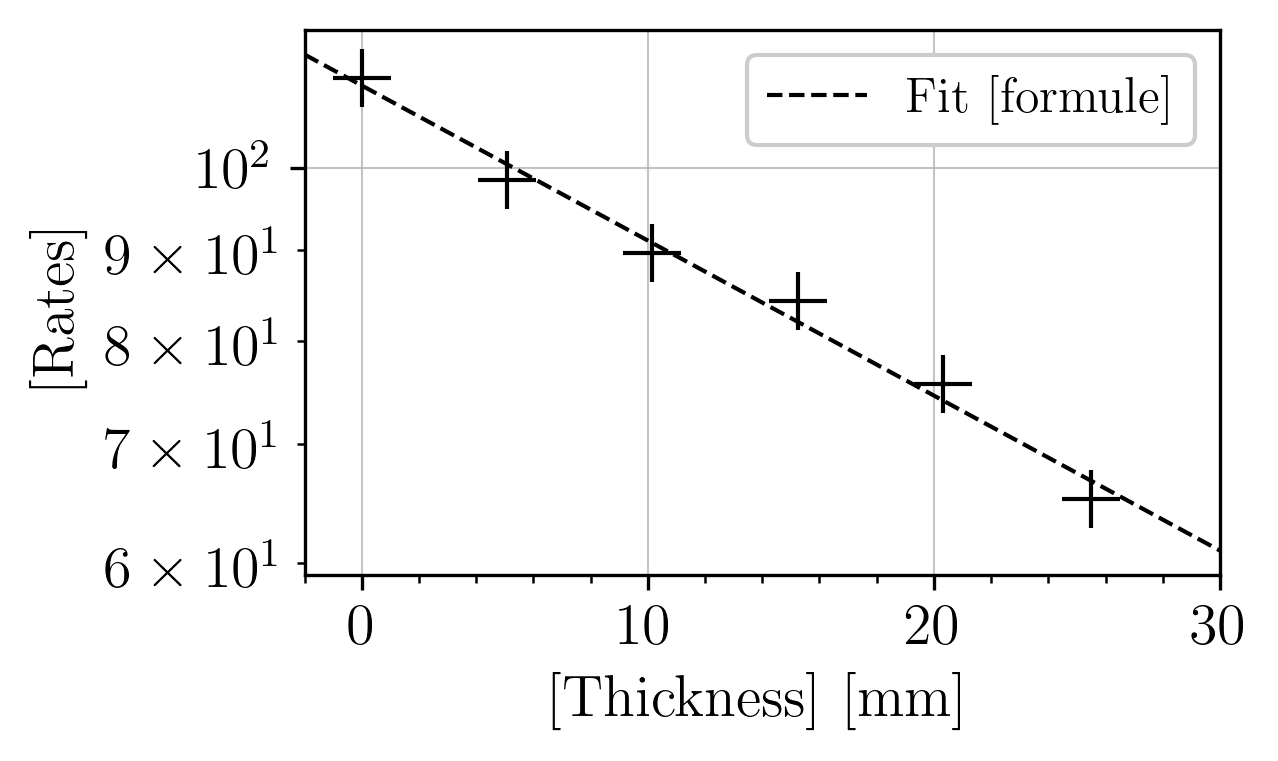

In [8]:
# === Plot Aluminum ===
fig, ax = plt.subplots(1,1, figsize=(10*INCH_PER_CM,6*INCH_PER_CM), dpi=300)
plt.yscale('log')
plt.xlabel("[Thickness] [mm]") # mettre les bons lettres
plt.ylabel("[Rates]")
left_xlim = -2
right_xlim = 30
plt.xlim(left_xlim, right_xlim)
x = np.linspace(left_xlim,right_xlim,50)

# peut etre minor ticks grid aussi?

plt.errorbar(al_thickness, al_rates, # couleurs à choisir et markers plus petits
             ls='', marker='+', c='black')
plt.plot(x, np.exp(al_params[0]*x)*np.exp(al_params[1]),
         ls='--', c='black',
         label='Fit [formule]')

plt.legend()
plt.savefig('../figures/attenuation_cs137_alu.pdf')

In [14]:
pb_thickness, pb_counts, pb_times = np.loadtxt("../data/counts_cs137_pb.csv",skiprows=1, unpack=True, delimiter=',')
pb_rates = pb_counts / pb_times
pb_rates_sigma = pb_rates * (ERROR_ATTENUATION_COUNT / pb_counts + ERROR_TIME / pb_times)

pb_params, pb_cov = np.polyfit(pb_thickness, np.log(pb_rates), 1, cov=True)
sigma_pb_params = np.sqrt(np.diag(pb_cov))

print(f"Attenuation coefficient pour plomb: {abs(pb_params[0]):.3f} ± {sigma_pb_params[0]:.3f}, I_0 = {pb_params[1]:.2f}")

Attenuation coefficient pour plomb: 0.108 ± 0.003, I_0 = 4.75


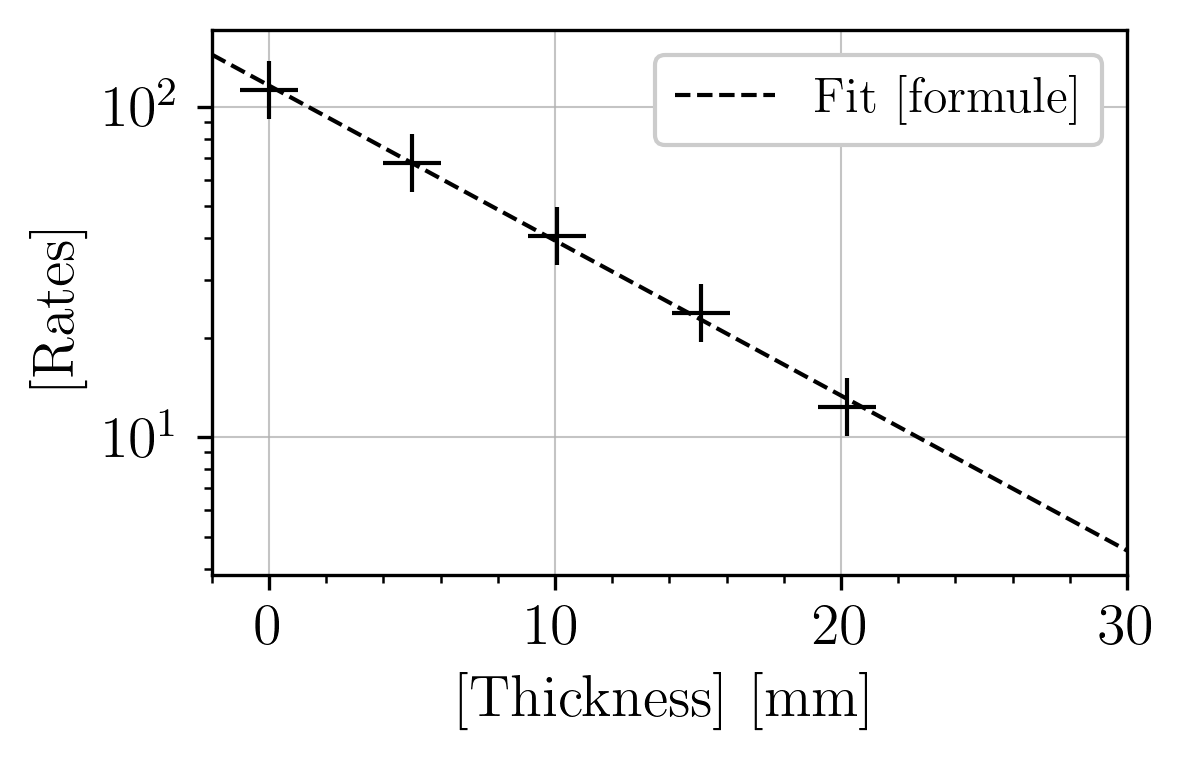

In [10]:
# === Plot Plomb ===
fig, ax = plt.subplots(1,1, figsize=(10*INCH_PER_CM,6*INCH_PER_CM), dpi=300)
plt.yscale('log')
plt.xlabel("[Thickness] [mm]") # mettre les bons lettres et markers plus petits
plt.ylabel("[Rates]")
left_xlim = -2
right_xlim = 30
plt.xlim(left_xlim, right_xlim)
x = np.linspace(left_xlim,right_xlim,50)

# TODO: put errors in description because small
# peut etre minor ticks grid aussi?
plt.errorbar(pb_thickness, pb_rates, # couleurs à choisir
             ls='', marker='+', c='black')
plt.plot(x, np.exp(pb_params[0]*x)*np.exp(pb_params[1]),
         ls='--', c='black',
         label='Fit [formule]')

plt.legend()
plt.savefig('../figures/attenuation_cs137_pb.pdf')